# How does rotation distribution change during optimization training?
* Under the normal training process the distribution of rotations the model is trained on should be uniformly distributed over $[0^{\circ}, 360^{\circ}]$. 
* Through the optimization process during training, we find that the model learns a more efficent representation where the digits of a given class are oriented at the same rotation. 
* We even find that the model learns to encode the "6" and "9" digits as $180^{\circ}$ rotations of one another, as this is the most compressed representation of the data.


In [279]:
import math
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [179]:
rot_hist_loc = '/media/rene/data/equivariance/mnist/batch_avae_mnist_L8_rotate_save_hist_correct/the_only_rot_history.pkl'
with open(rot_hist_loc, 'rb') as f:
    rot_hist = pickle.load(f)

In [183]:
def reformat_rot_hist(rot_hist, epoch):
    data = pd.DataFrame()
    # 100 batches is enough
    for batch_idx in range(100):
        affine_params = rot_hist[epoch][batch_idx]
        target = rot_hist[epoch][batch_idx]
        rot = rot_hist[epoch][batch_idx]
        # grab all the stuff from inside each batch
        for img_idx in range(len(rot_hist[epoch][batch_idx][0])):
            affine_params = rot_hist[epoch][batch_idx][0][img_idx]
            target = rot_hist[epoch][batch_idx][1][img_idx]
            rot = rot_hist[epoch][batch_idx][2][img_idx]
            data = data.append({
                                'actual_rot': rot,
                                'affine_rot': math.acos(affine_params[0, 0])*180/math.pi,
                                'target': target,
                            }, ignore_index=True)    
    return data

,actual_rot,affine_rot,target
0,249.0,122.776927,4.0
1,140.0,46.770257,1.0
2,307.0,136.157572,1.0
3,230.0,137.621520,9.0
4,13.0,141.173986,6.0


In [185]:
ep1_data = reformat_rot_hist(rot_hist, epoch=1)
ep1_data['rot_off_center'] = ep1_data['affine_rot'] - ep1_data['actual_rot']
ep1_data['rot_off_center'] = ep1_data['rot_off_center'] % 360
data = ep1_data[ep1_data['target'] == 0]
print(len(ep1_data), len(data))
data.head()

25600 2555


,actual_rot,affine_rot,target,rot_off_center
9,247.0,44.732240,0.0,157.732240
16,128.0,45.719237,0.0,277.719237
55,357.0,141.736323,0.0,144.736323
61,243.0,44.049264,0.0,161.049264
66,123.0,39.067359,0.0,276.067359


## Distribution of Rotations Over Time
* How does the distribution of rotations fed into the network change over time?

In [270]:
def compare_rotations(rot_hist, epochs=[1, 15, 30, 59], target=1, save_loc=None):
    plt.style.use('ggplot')
    fig, ax = plt.subplots(len(epochs), 1, figsize=(8,10))#, sharex='col', sharey='row',figsize=(10,10))

    for i,  epoch in enumerate(epochs):
        data = reformat_rot_hist(rot_hist, epoch)
        data = data[data['target'] == target]
        data['rot_off_center'] = data['affine_rot'] - data['actual_rot']
        data['rot_off_center'] = data['rot_off_center'] % 360
        ax[i].set_ylabel(f'Epoch {epoch}', fontsize='large')  
        ax[i].hist(data['rot_off_center'], 20, density=True, facecolor='g', alpha=0.75)
        ax[i].yaxis.set_major_locator(plt.MultipleLocator(.002))
    
    ax[0].set_xticklabels([])
    ax[1].set_xticklabels([])
    ax[2].set_xlabel(f'Rotation', fontsize='large')  
    plt.subplots_adjust(wspace=.1, hspace=.1)
    plt.tight_layout()
    if save_loc is not None:
        plt.savefig(save_loc, bbox_inches='tight')
    plt.show()

In [271]:
rot_hist_loc = '/media/rene/data/equivariance/mnist/batch_avae_mnist_L8_rotate_save_hist_correct/the_only_rot_history.pkl'
with open(rot_hist_loc, 'rb') as f:
    rot_hist = pickle.load(f)

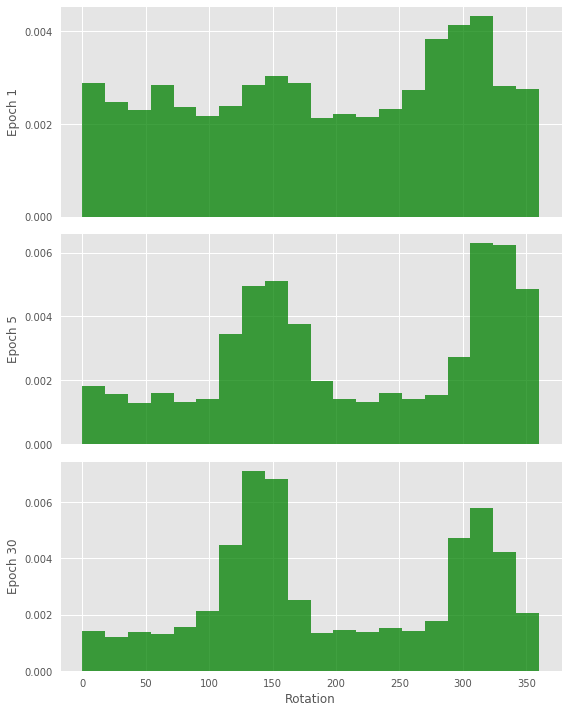

In [273]:
plt.style.use('ggplot')
compare_rotations(rot_hist, epochs=[1, 5, 30], target=1, 
                  save_loc='/media/rene/code/equivariance/imgs/rot_batch_opt_1.png')

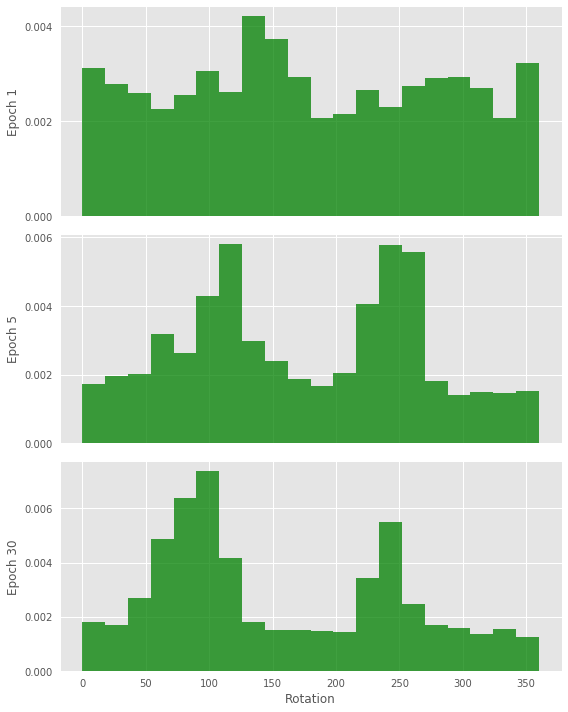

In [274]:
compare_rotations(rot_hist, epochs=[1, 5, 30], target=8, 
                  save_loc='/media/rene/code/equivariance/imgs/rot_batch_opt_8.png')

In [277]:
def _69(rot_hist, epochs=[1, 15, 30, 59], save_loc=None):
    plt.style.use('ggplot')
    fig, ax = plt.subplots(len(epochs), 2, figsize=(10,10))

    for i,  epoch in enumerate(epochs):
        data = reformat_rot_hist(rot_hist, epoch)
        data['rot_off_center'] = data['affine_rot'] - data['actual_rot']
        data['rot_off_center'] = data['rot_off_center'] % 360
        data_6 = data[data['target'] == 6]
        data_9 = data[data['target'] == 9]
        ax[i, 0].hist(data_6['rot_off_center'], 20, density=True, facecolor='g', alpha=0.75)
        ax[i, 1].hist(data_9['rot_off_center'], 20, density=True, facecolor='g', alpha=0.75)
        ax[i, 0].yaxis.set_major_locator(plt.MultipleLocator(.002))
        ax[i, 0].set_ylabel(f'Epoch {epoch}', fontsize='large')
        ax[i, 1].set_yticklabels([])
        if i < len(epochs)-1:
            ax[i, 0].set_xticklabels([])
            ax[i, 1].set_xticklabels([])
            
    ax[2, 0].set_xlabel(f'Rotation: Digit="6"', fontsize='large')  
    ax[2, 1].set_xlabel(f'Rotation: Digit="9"', fontsize='large')  
    plt.subplots_adjust(wspace=.1, hspace=.1)
    if save_loc is not None:
        plt.savefig(save_loc, bbox_inches='tight')
    plt.show()

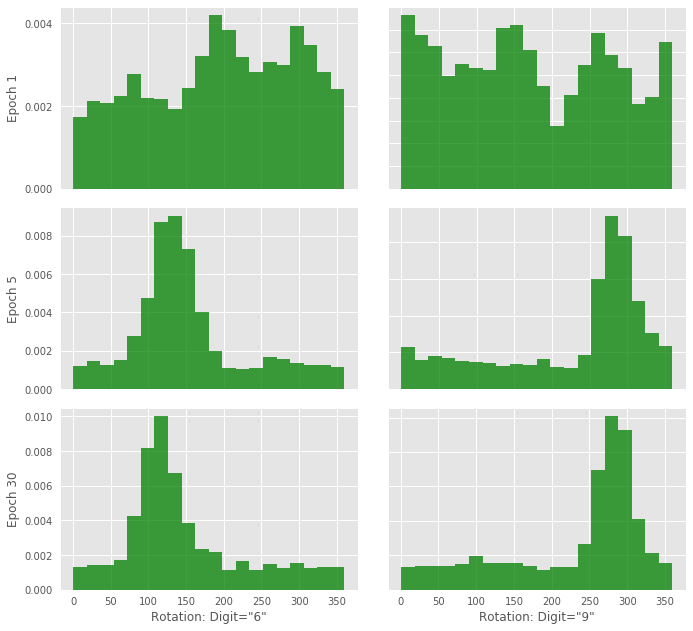

In [278]:
_69(rot_hist, epochs=[1, 5, 30], save_loc='/media/rene/code/equivariance/imgs/rot_batch_opt_69.png')